# Variables Description:-

PassengerId:
A unique identifier assigned to each passenger.

Survived:
Indicates whether the passenger survived (1) or not (0).

Pclass:
The class of the ticket the passenger purchased –
1 = First class, 2 = Second class, 3 = Third class.

Name:
Full name of the passenger (includes titles like Mr., Mrs., etc.).

Sex:
Gender of the passenger – male or female.

Age:
Age of the passenger in years .

SibSp:
Number of siblings or spouses the passenger had aboard the Titanic.

Parch:
Number of parents or children the passenger had aboard the Titanic.

Ticket:
Ticket number assigned to the passenger.

Fare:
The fare paid by the passenger for the ticket (in British pounds).

Cabin:
Cabin number assigned to the passenger.

Embarked:
Port of embarkation –
C = Cherbourg, Q = Queenstown, S = Southampton.

# Hypotheses for Titanic Data Analysis

- Survival Rate by Gender. Females had a higher chance of survival than males.
- Impact of Passenger Class. First-class passengers were more likely to survive than those in second or third class.
- Age Factor in Survival. Children (e.g., under 10) had a higher survival rate than adults.
- Family Size Influence. Passengers with family members aboard (SibSp or Parch > 0) were more likely to survive than those alone.
- Embarkation Port Effect. Survival rates varied based on the port of embarkation (C, Q, S).
- Cabin Information Availability. Passengers with assigned cabin numbers had a higher survival rate, indicating class or priority.
- Survival by Title (Mr, Mrs, Miss, etc.). Passengers with titles such as "Mrs." or "Miss" had a higher survival rate than "Mr."
- Passenger Class vs. Fare Paid. Higher class passengers paid significantly more than lower class passengers.
- Age Distribution by Class. Average age varied across the three classes, with older passengers mostly in first class.
- Embarked Port vs. Fare Paid in percentanse. Fare differed significantly based on the port of embarkation.
- Survival Rate by Family Size. Very large families or those traveling alone had lower survival rates compared to small families.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title
plt.title = title

In [14]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Original columns use mixed casing (e.g., PassengerId, Pclass), which can:
- Lead to confusion during coding.
- Cause bugs if column names are mistyped.
  
Short, simple column names are easier to type and read in code.

In [20]:
df.rename(columns={
    'PassengerId': 'passengerid',
    'Survived': 'survived',
    'Pclass': 'pclass',
    'Name': 'name',
    'Sex': 'sex',
    'Age': 'age',
    'SibSp': 'sibsp',
    'Ticket': 'ticket',
    'Fare': 'fare',
    'Cabin': 'cabin',
    'Embarked': 'embarked',
    'Parch': 'parch',
}, inplace=True)
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [22]:
df.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [24]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
print((df.isnull().mean()*100).round(2))

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
dtype: float64


In [28]:
copy_df = df

# Fill Missing Age Values Based on Gender.

In [31]:
# calculates the percentage of missing age values among male 
male = (copy_df[copy_df['sex'] == 'male']['age'].isnull().mean() * 100)
male

21.49046793760832

In [33]:
# calculates the percentage of missing age values among female 
female = (copy_df[copy_df['sex'] == 'female']['age'].isnull().mean() * 100)
female

16.878980891719745

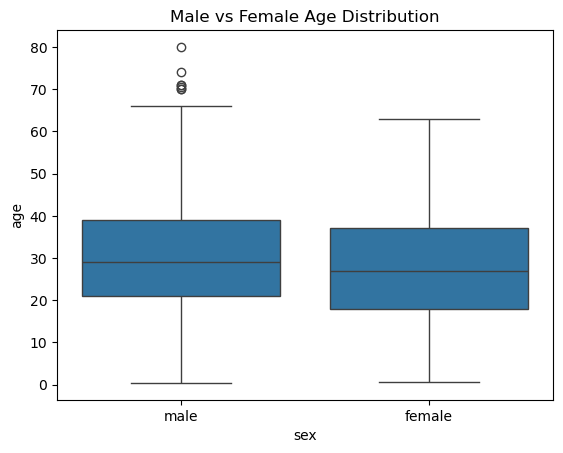

In [35]:
#boxplot for male female outlier
sns.boxplot(x='sex', y='age', data=copy_df)
plt.title("Male vs Female Age Distribution")
plt.show()

In [37]:
#fill none value of age in new column 
copy_df['age_filled'] = copy_df['age']  

copy_df.loc[(copy_df['age_filled'].isnull()) & (copy_df['sex'] == 'male'), 'age_filled'] = copy_df[copy_df['sex'] == 'male']['age'].notnull().median()
copy_df.loc[(copy_df['age_filled'].isnull()) & (copy_df['sex'] == 'female'), 'age_filled'] = copy_df[copy_df['sex'] == 'female']['age'].notnull().mean()


In [39]:
copy_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'age_filled'],
      dtype='object')

# Fill Missing Age Values

In [ ]:
copy_df['embarked'].fillna(copy_df['embarked'].mode()[0], inplace=True)

# Fill Missing cabin Values

In [ ]:
copy_df['cabin_Filled'] = copy_df['cabin'].astype(str).str[0]

copy_df['cabin_Filled'].replace('n', np.nan, inplace=True)

deck_mode = copy_df['cabin_Filled'].mode()[0]
copy_df['cabin_Filled'].fillna(deck_mode, inplace=True)

-> A single high fare could wrongly influence the model to assume high fare = important factor for survival.

In [48]:
copy_df = copy_df[copy_df['fare'] != 512.3292]

# correlation of numeric columns

- Passengers who paid higher fares were more likely to survive — possibly indicating 1st class or priority boarding.
- Slight positive effect — having parents/children on board slightly improved survival.
- Very weak negative — having siblings/spouse didn't help much, might slightly reduce survival chances.
- Strong negative: Higher class = higher fare, expected.
- Passengers traveling with siblings likely also had parents/kids on board. They usually came as family units.

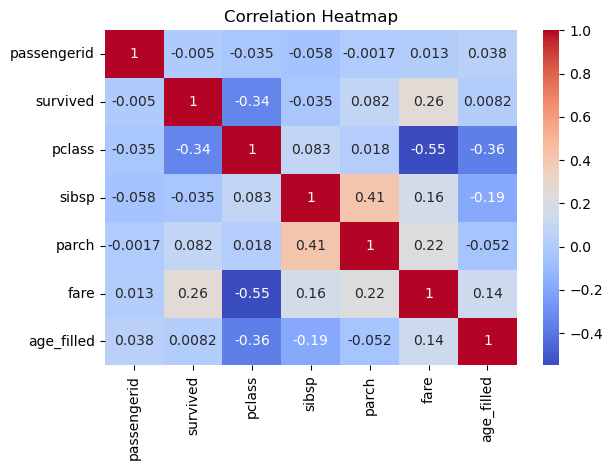

In [52]:
corr = df.drop(columns='age').corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


- Younger people survived more.
- Most survivors were under the age of 15.Children had a better chance of survival.
- People who paid more (higher fare) were more likely to survive.
- These passengers were mostly in 1st or 2nd class.Class mattered a lot.
- Very few people from 3rd class survived.
- Age and Fare are not directly related.
- People of all ages paid different ticket prices.But those who paid high prices (regardless of age) mostly survived.
- Family size made a difference.Passengers with 1 or 2 family members had a better chance to survive.
- People alone or with large families had lower survival chances.

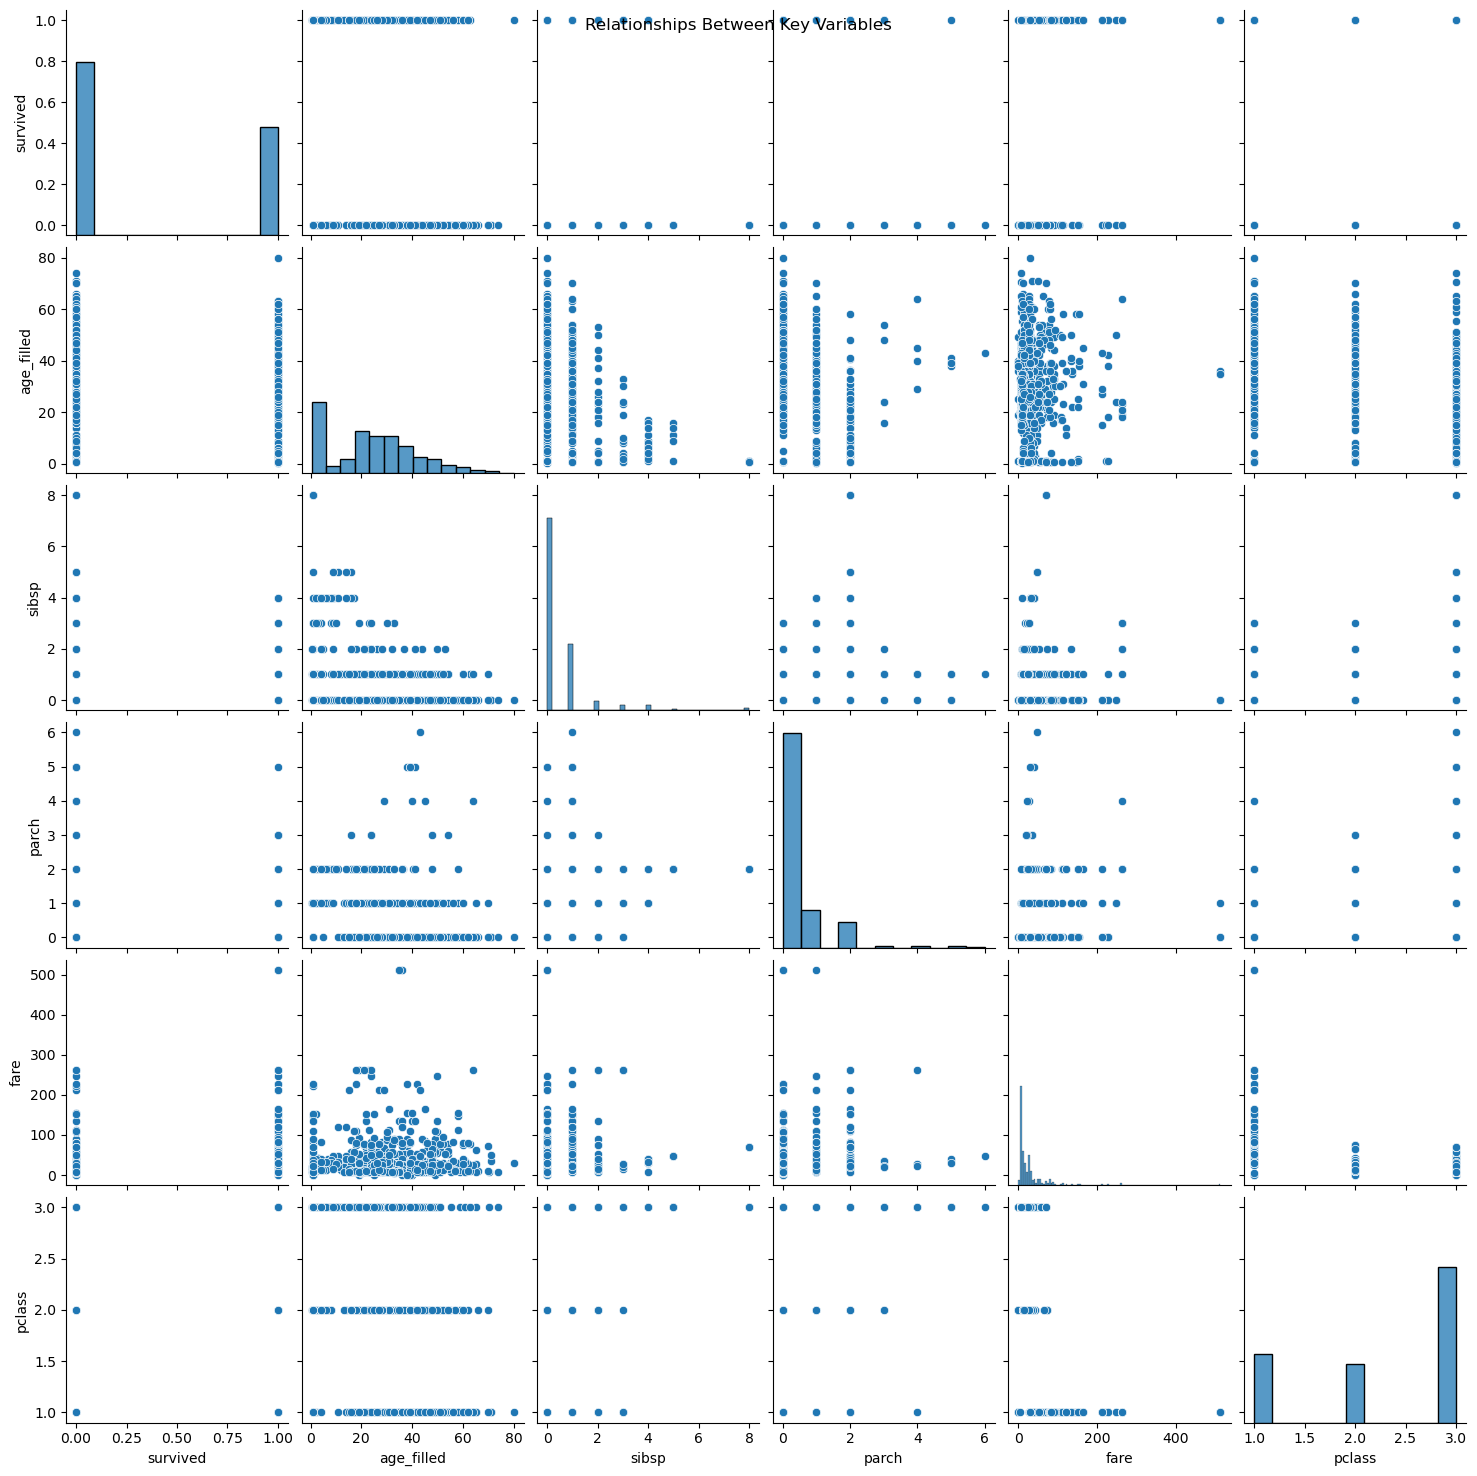

In [55]:
sns.pairplot(df[['survived', 'age_filled', 'sibsp', 'parch' , 'fare' , 'pclass']])
plt.suptitle("Relationships Between Key Variables")
plt.show()

- A large number of males did not survive—only 18.6% survived.
- In contrast, females had a much higher survival rate of 74%.
- This shows that women were prioritized during evacuation.
- Gender played a big role in survival chances on the Titanic.

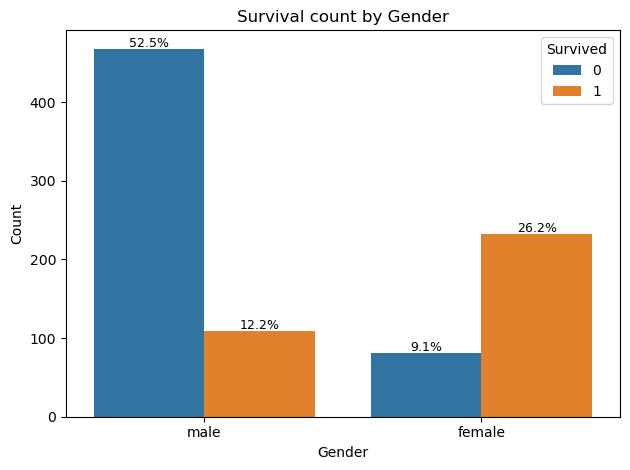

In [57]:
ax = sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived')

total_passengers = len(df)

categories = [tick.get_text() for tick in ax.get_xticklabels()]

for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            percent = height / total_passengers * 100
            label = f"{percent:.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,
                label,
                ha='center',
                fontsize=9
            )

plt.tight_layout()
plt.show()

In [58]:
pclass_survival_ratio = (df.groupby('pclass')['survived'].mean() * 100).round(2)


- Class 1 passengers had the highest survival rate at 46.5%.
- Class 2 followed with a survival rate of 35.4%.
- Class 3 had the lowest survival chance—only 18.1% survived.

This shows that higher-class passengers were given more priority during rescue.

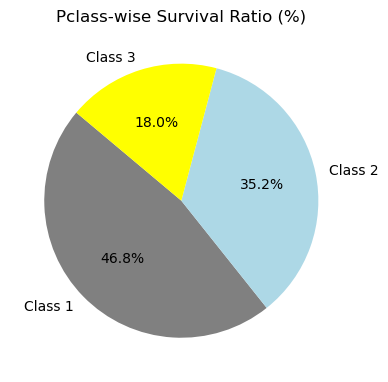

In [60]:
plt.figure(figsize = (4,4))
plt.pie(pclass_survival_ratio ,
       labels = [f'Class {i}' for i in pclass_survival_ratio.index],
       autopct = '%1.1f%%',
       startangle = 140,
       colors = ['grey' , 'lightblue' , 'yellow'] )
plt.title('Pclass-wise Survival Ratio (%)')
plt.tight_layout()
plt.show()

- Most passengers are between 20 to 35 years old, indicating that the majority were young adults.
- There is a noticeable peak around age 25, showing a high frequency in that group.
- The distribution is right-skewed, meaning fewer older passengers were on board, with age gradually declining after 40.

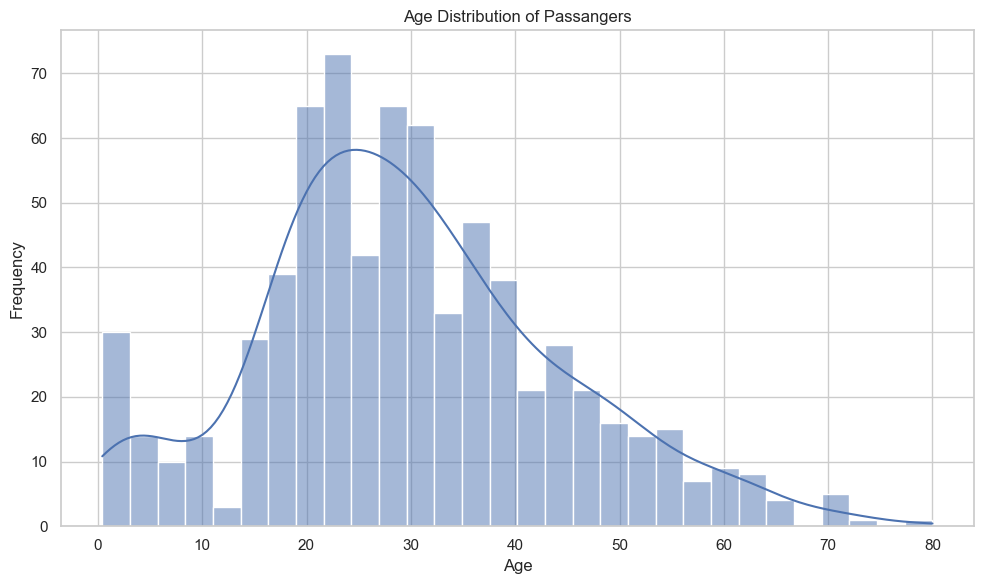

In [62]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

sns.histplot(data = df , x = 'age' , bins = 30 , kde = True)
plt.title('Age Distribution of Passangers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Most passengers boarded from Port S (Southampton), but this group also had the highest number of non-survivors (48.2%).
- Port C (Cherbourg) had fewer passengers overall but showed a higher survival rate compared to Port S.
- Port Q (Queenstown) had the lowest boarding numbers and also the lowest survival count (3.4%).
- The chart highlights that embarkation port had an influence on survival, possibly due to socio-economic or class differences.

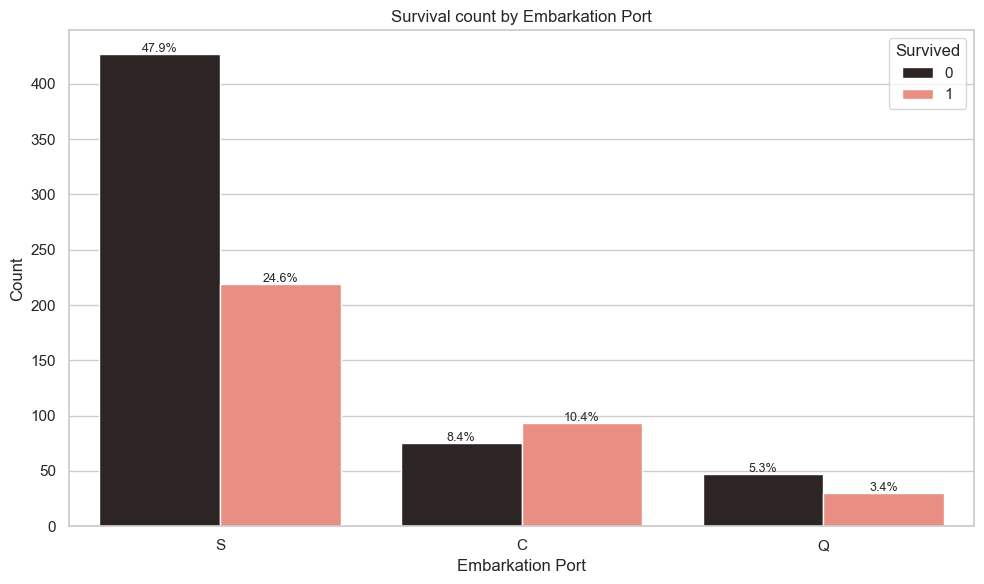

In [64]:
ax = sns.countplot(data=df, x='embarked', hue='survived', palette='dark:salmon')
plt.title('Survival count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(title='Survived')

total_passengers = len(df)

categories = [tick.get_text() for tick in ax.get_xticklabels()]

for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            percent = height / total_passengers * 100
            label = f"{percent:.1f}%"
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,
                label,
                ha='center',
                fontsize=9
            )

plt.tight_layout()
plt.show()

- Passengers with family size 1 to 3 had the highest survival rates, peaking at size 3 (around 72%).
- Survival drops sharply for family sizes larger than 3, especially from size 4 onwards.
- Solo travelers (family size 0) had relatively low survival rates (~30%).
- Very large families (7 or more members) had a 0% survival rate, indicating high risk for bigger groups.

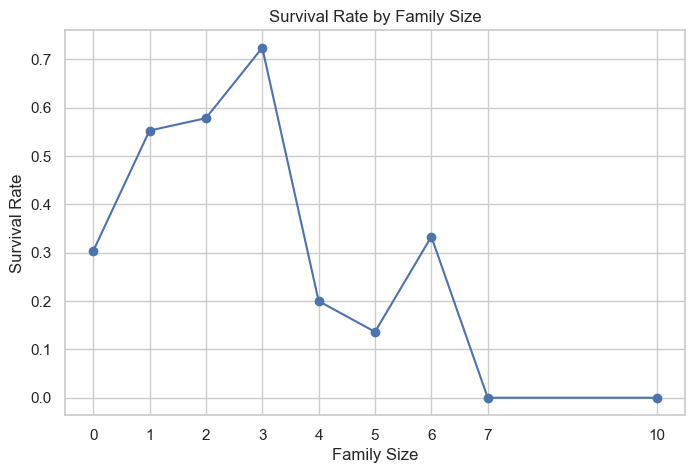

In [66]:
df['familysize'] = df['sibsp'] + df['parch']

family_survival = df.groupby('familysize')['survived'].mean().reset_index()

plt.figure(figsize = (8,5))
plt.plot(family_survival['familysize'],family_survival['survived'],marker = 'o' , linestyle = '-')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.xticks(family_survival['familysize'])
plt.show()

- Passengers without cabin information form the majority, and among them, more than half did not survive (54.3%).
- Only 23.1% of passengers without cabin info survived, showing low survival chances in this group.
- Passengers with cabin information had a better survival rate — 14.9% survived out of a smaller group.
- This suggests that having a cabin (likely higher class) might be linked to better chances of survival.

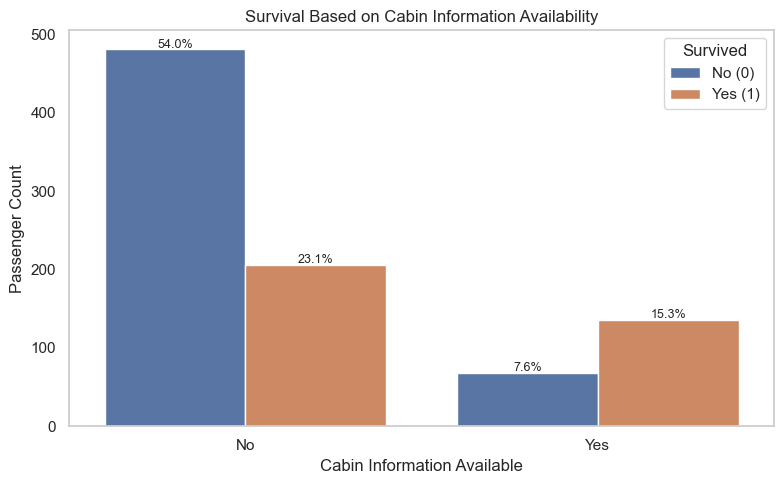

In [68]:
df['cabin_available'] = df['cabin'].notnull().map({True: 'Yes', False: 'No'})

total_passengers = len(df)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='cabin_available', hue='survived')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            percent = (height / total_passengers) * 100
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 2,
                f'{percent:.1f}%',
                ha='center',
                fontsize=9
            )

plt.title('Survival Based on Cabin Information Availability')
plt.xlabel('Cabin Information Available')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

-> extract name title

In [75]:
df['title'] = df['name'].str.extract(r',\s*([^\.]+)\.')
title_survival = df.groupby('title')['survived'].mean().sort_values(ascending=False) * 100
title_survival

title
the Countess    100.000000
Mlle            100.000000
Sir             100.000000
Ms              100.000000
Lady            100.000000
Mme             100.000000
Mrs              79.200000
Miss             69.780220
Master           57.500000
Col              50.000000
Major            50.000000
Dr               42.857143
Mr               15.667311
Jonkheer          0.000000
Rev               0.000000
Don               0.000000
Capt              0.000000
Name: survived, dtype: float64

- Titles like “Miss” and “Mrs” show higher survival percentages, suggesting women had a better chance of survival.
- Children (title: Master) also had a relatively high survival rate compared to male adults.

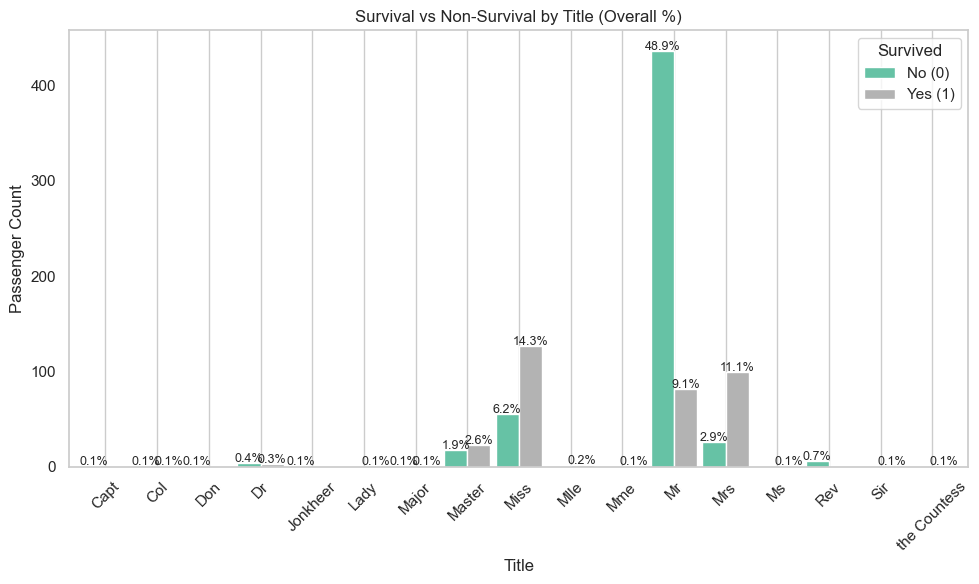

In [81]:
total_passengers = len(df)

title_counts = df.groupby(['title', 'survived']).size().unstack(fill_value=0)

ax = title_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Set2' , width=0.9)

plt.title('Survival vs Non-Survival by Title (Overall %)')
plt.xlabel('Title')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = (height / total_passengers) * 100
        ax.text(
            p.get_x() + p.get_width() / 2., 
            height + 1, 
            f'{percentage:.1f}%', 
            ha='center', fontsize=9
        )

plt.show()

Most passengers paid lower fares, with a sharp concentration of tickets in the lowest fare range.
3rd class passengers dominate the low fare range, indicating it was the most affordable and widely used class.
1st class passengers are distributed across a wide range of fares, especially in the higher fare segments.
2nd class passengers mostly fall in the mid-range fares, with fewer high-fare entries compared to 1st class.

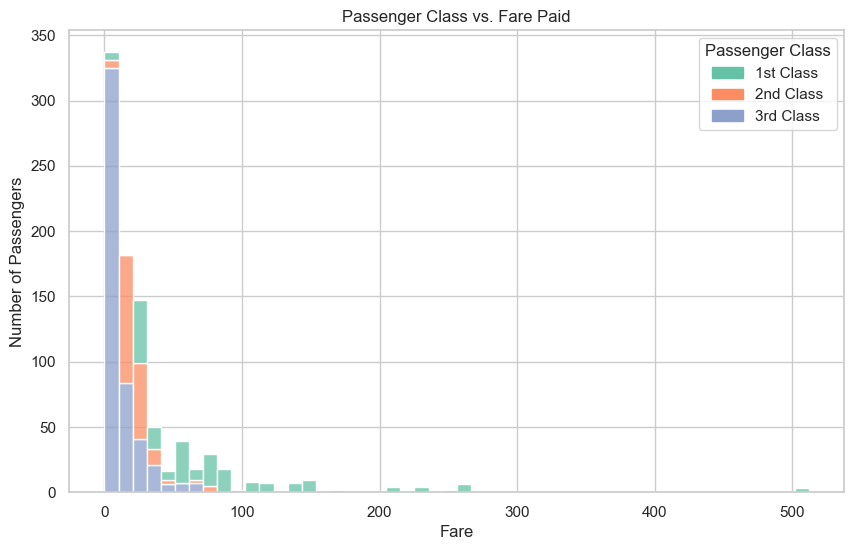

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fare', hue='pclass', bins=50, kde=False, palette='Set2', multiple='stack')

plt.title('Passenger Class vs. Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

from matplotlib.patches import Patch

legend_labels = ['1st Class', '2nd Class', '3rd Class']
colors = sns.color_palette('Set2', 3)
handles = [Patch(color=colors[i], label=legend_labels[i]) for i in range(3)]
plt.legend(handles=handles, title='Passenger Class')

plt.show()

Age Distribution by Class. Average age varied across the three classes, with older passengers mostly in first class.
- Older passengers cluster in Class 1.
- Younger passengers are more common in Class 3.
- Class 2 shows a mid-range mix of ages.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6364\2388887068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='pclass', y='age', jitter=True, palette='Set1')


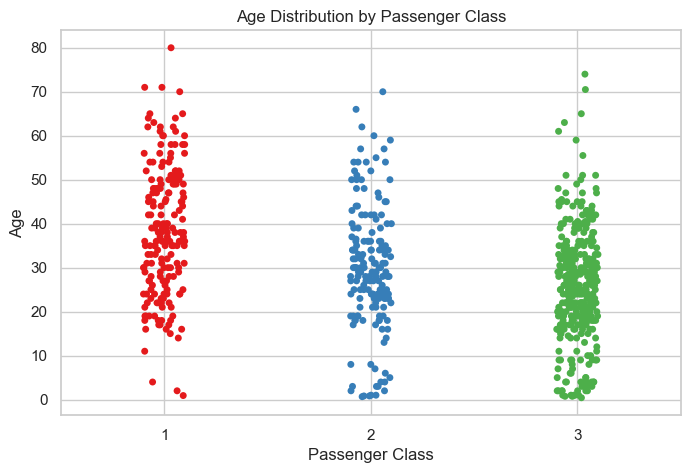

In [87]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='pclass', y='age', jitter=True, palette='Set1')

plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Embarked Port vs. Fare Paid in percentanse. Fare differed significantly based on the port of embarkation. 
- This pie chart will visually show which port (C = Cherbourg, Q = Queenstown, S = Southampton) contributed the most to the total fare collected, indirectly reflecting economic status of passengers from each port.

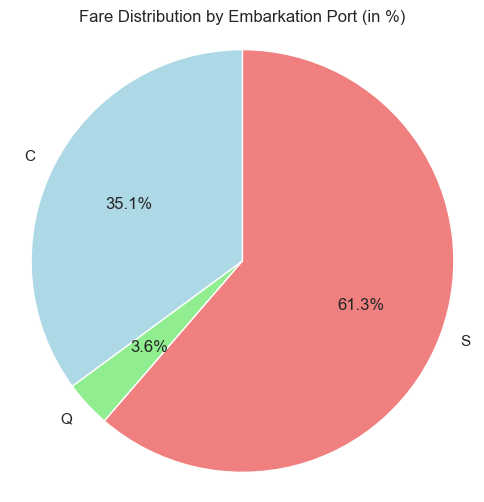

In [90]:
embarked_fare = df.dropna(subset=['embarked', 'fare'])

fare_by_port = embarked_fare.groupby('embarked')['fare'].sum()

plt.figure(figsize=(6, 6))
plt.pie(fare_by_port, labels=fare_by_port.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Fare Distribution by Embarkation Port (in %)')
plt.axis('equal') 
plt.show()

- Passengers with fewer family members aboard (SibSp or Parch ≤ 2) generally paid a wider range of fares, including the highest.
- As the number of accompanying family members increases, the fare tends to be lower and more consistent, possibly due to group ticketing or lower-class cabins.

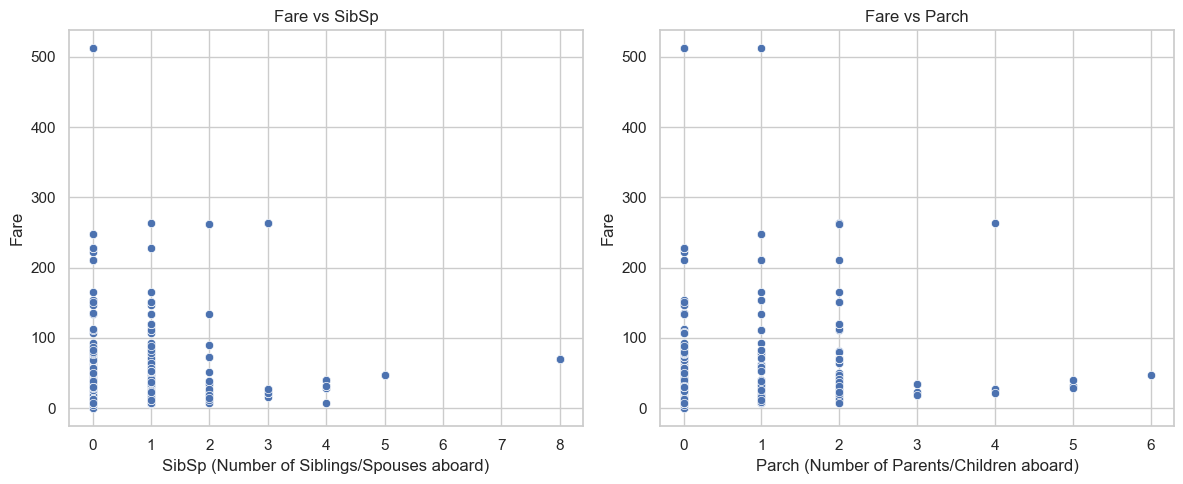

In [93]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sibsp', y='fare')
plt.title('Fare vs SibSp')
plt.xlabel('SibSp (Number of Siblings/Spouses aboard)')
plt.ylabel('Fare')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='parch', y='fare')
plt.title('Fare vs Parch')
plt.xlabel('Parch (Number of Parents/Children aboard)')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

- This code helps analyze the seat number ranges within each Titanic cabin category (A, B, C, etc.).
- It reveals that cabin assignments were not random — they reflected a passenger’s class, level of luxury, and possibly their survival chances.

In [96]:
import re
cabin_data = df['cabin'].dropna()
cabin_ranges = {}

for cabin in cabin_data:
    cabins = cabin.split()  
    for c in cabins:
        match = re.match(r'([A-G])(\d+)', c)
        if match:
            letter = match.group(1)
            number = int(match.group(2))
            if letter in cabin_ranges:
                cabin_ranges[letter].append(number)
            else:
                cabin_ranges[letter] = [number]

for letter, numbers in cabin_ranges.items():
    print(f"{letter}: {min(numbers)} to {max(numbers)} (total {len(numbers)} values)")

C: 2 to 148 (total 71 values)
E: 8 to 121 (total 33 values)
G: 6 to 73 (total 7 values)
D: 6 to 56 (total 31 values)
A: 5 to 36 (total 15 values)
B: 3 to 102 (total 64 values)
F: 2 to 38 (total 9 values)


C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_6364\2343693621.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate_by_deck, x='deck', y='survived', palette='coolwarm')


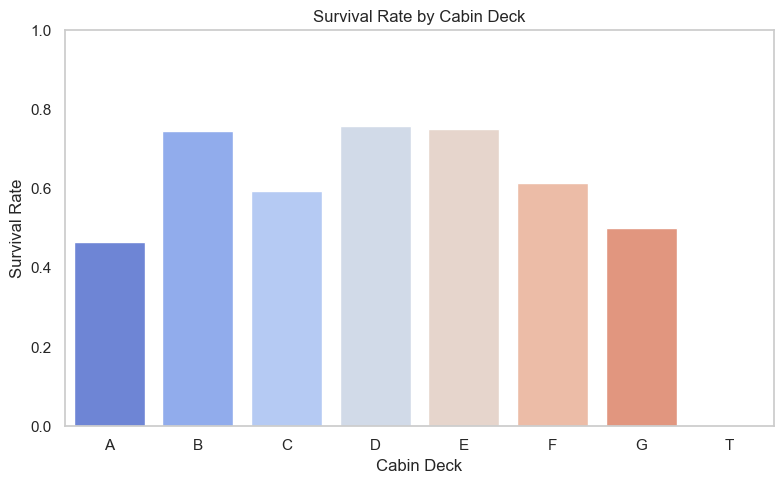

In [98]:
df['deck'] = df['cabin'].str[0]
deck_survival = df.dropna(subset=['deck'])

survival_rate_by_deck = (
    deck_survival.groupby('deck')['survived']
    .mean()
    .sort_index()
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=survival_rate_by_deck, x='deck', y='survived', palette='coolwarm')

plt.title('Survival Rate by Cabin Deck')
plt.ylabel('Survival Rate')
plt.xlabel('Cabin Deck')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Data Insights

- The Titanic dataset reveals strong links between passenger class, gender, and survival chances.
- Females and children, especially from 1st class, had the highest survival rates, highlighting evacuation priorities.
- Titles helped identify social status, age groups, and even gender — which all affected survival. For example, "Miss" and "Mrs" had better chances than "Mr."
- Passengers with small family groups (1–3 members) had better survival than those traveling alone or with large families.
- Cabins in decks like B ,D ,E (mostly 1st class) had higher survival, while lower decks like G and T (3rd class) were more fatal, possibly due to their distance from lifeboats.

# Data Preprocessing

Boxplot for Outliers detaction

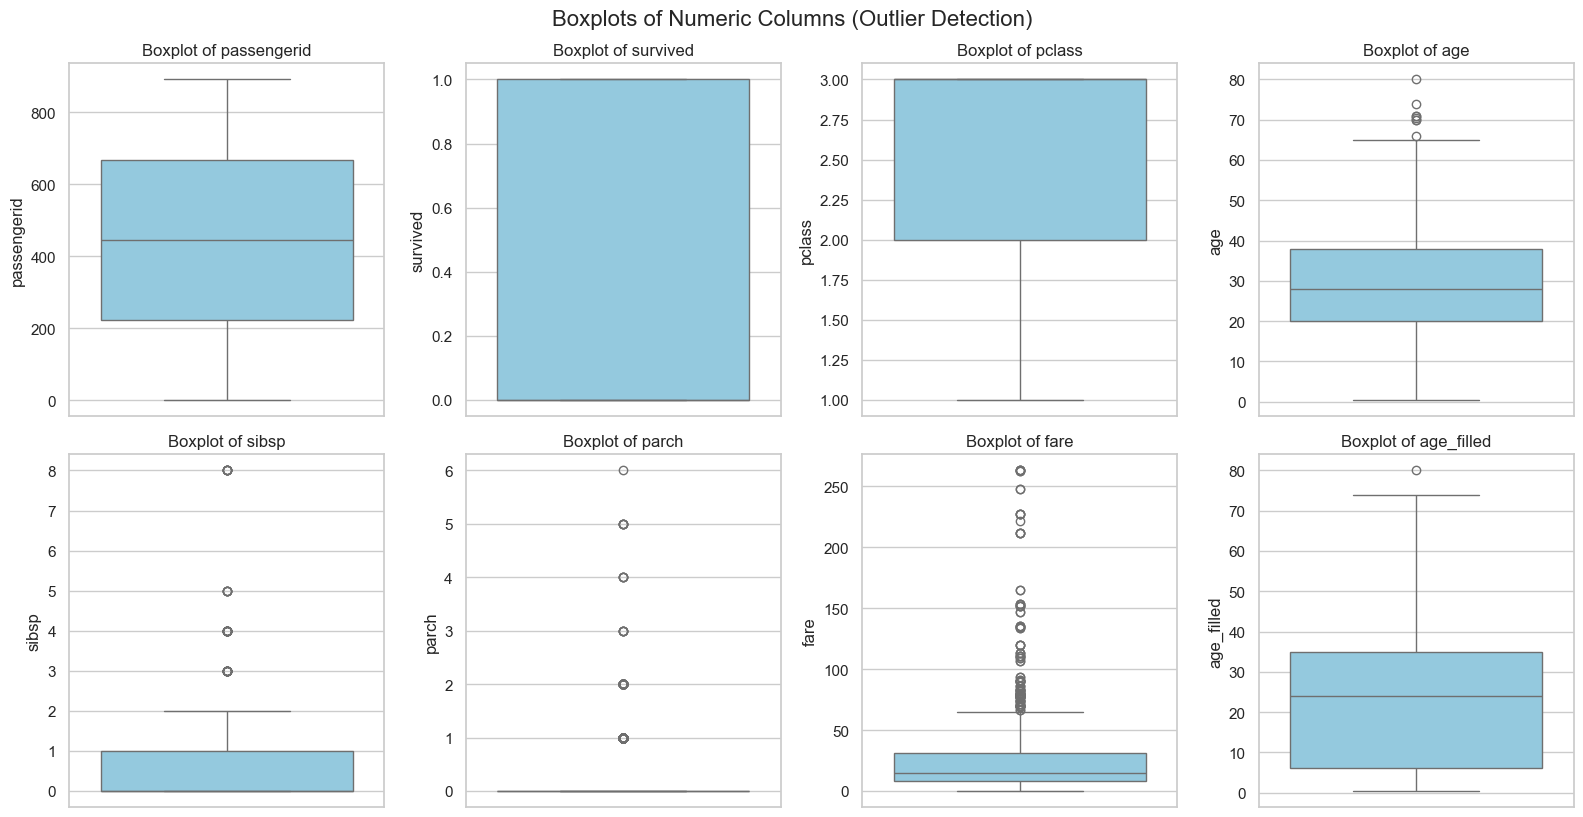

In [104]:
numeric_cols = copy_df.select_dtypes(include='number')

plt.figure(figsize=(16, 8))

for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, (len(numeric_cols.columns) + 1) // 2, i)
    sns.boxplot(y=copy_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.suptitle("Boxplots of Numeric Columns (Outlier Detection)", fontsize=16, y=1.02)
plt.show()

# Remove Outliers using IQR

In [106]:
columns = ['age', 'fare', 'sibsp', 'parch', 'age_filled']

for col in columns:
    Q1 = copy_df[col].quantile(0.25)
    Q3 = copy_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    copy_df = copy_df[(copy_df[col] >= lower_bound) & (copy_df[col] <= upper_bound)]

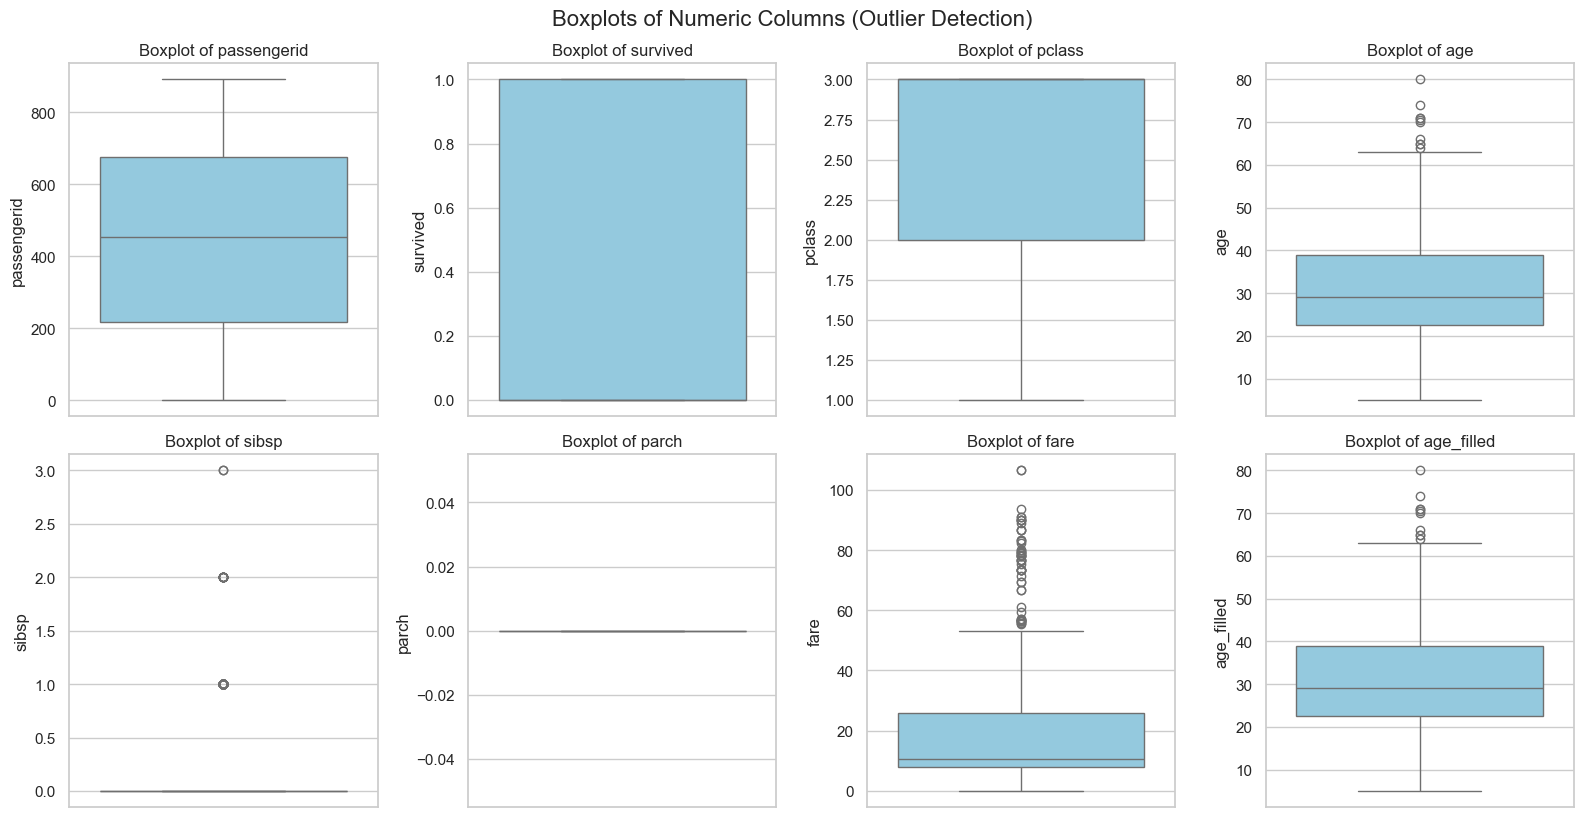

In [109]:
numeric_cols = copy_df.select_dtypes(include='number')

plt.figure(figsize=(16, 8))

for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(2, (len(numeric_cols.columns) + 1) // 2, i)
    sns.boxplot(y=copy_df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.suptitle("Boxplots of Numeric Columns (Outlier Detection)", fontsize=16, y=1.02)
plt.show()

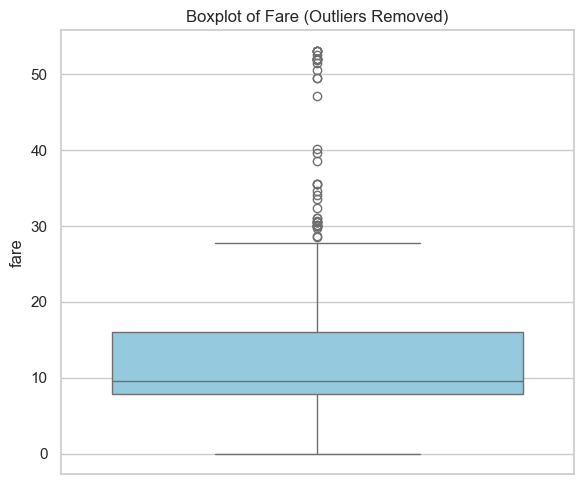

In [110]:
Q1 = copy_df['fare'].quantile(0.25)
Q3 = copy_df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fare_cleaned = copy_df[(copy_df['fare'] >= lower_bound) & (copy_df['fare'] <= upper_bound)]

plt.figure(figsize=(6, 5))
sns.boxplot(y=fare_cleaned['fare'], color='skyblue')
plt.title('Boxplot of Fare (Outliers Removed)')
plt.tight_layout()
plt.show()

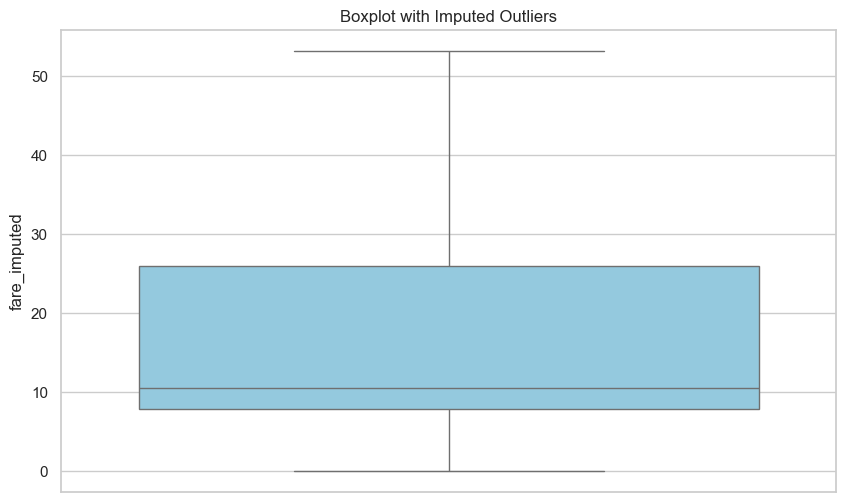

In [111]:
# Impute outliers with bounds (optional: can also use median)
copy_df['fare_imputed'] = copy_df['fare']

copy_df.loc[copy_df['fare'] < lower_bound, 'fare_imputed'] = lower_bound
copy_df.loc[copy_df['fare'] > upper_bound, 'fare_imputed'] = upper_bound

sns.boxplot(y=copy_df['fare_imputed'], color='skyblue')
plt.title("Boxplot with Imputed Outliers")
plt.show()

# Categorical Columns Encoding 

In [116]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
copy_df["sex_code"] = ord_enc.fit_transform(copy_df[["sex"]])
copy_df[["sex", "sex_code"]].head(5)

,sex,sex_code
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0


In [118]:
copy_df["embarked"].value_counts()

embarked
S    405
C     77
Q     21
Name: count, dtype: int64

In [120]:
copy_df["embarked_code"] = copy_df["embarked"].map({"S": 1, "C": 2 , "Q": 3})
copy_df[["embarked", "embarked_code"]].head()
               

,embarked,embarked_code
0,S,1
1,C,2
2,S,1
3,S,1
4,S,1


In [122]:
copy_df['title'] = copy_df['name'].str.extract(r',\s*([^\.]+)\.')


In [124]:
title_map = {
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2,
    'Master': 3,
    'Dr': 4,
    'Rev': 5,
    'Col': 6,
    'Major': 7,
    'Mlle': 8,
    'Mme': 9,
    'Ms': 10,
    'Lady': 11,
    'Sir': 12,
    'Don': 13,
    'Jonkheer': 14,
    'Capt': 15,
    'Countess': 16
}

copy_df['title_code'] = copy_df['title'].map(title_map).fillna(-1).astype(int)


In [126]:
copy_df.rename(columns={'title_code': 'name_code'}, inplace=True)

In [130]:
copy_df['deck'] = copy_df['cabin_Filled'].astype(str).str.extract(r'([A-Za-z])')
deck_map = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3,
    'E': 4, 'F': 5, 'G': 6, 'T': 7
}

copy_df['cabin_code'] = copy_df['deck'].map(deck_map).fillna(-1).astype(int)

-> Drop unnecessary columns

In [134]:
copy_df.drop(columns=['ticket'], inplace=True)

In [136]:
copy_df.drop(columns=['deck'], inplace=True)

In [ ]:
copy_df.drop(columns=['title'], inplace=True)